# 1. Подгрузка данных и общая инфорация

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('drive/MyDrive/data_analysis/exploratoryDataAnalysis/real_estate_data.csv')

In [4]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Видно, что данные неправильно подгрузились. Чтобы это изменить, воспользуемся параметром `sep` функции `pd.csv_read` для того, чобы явно указать разделитель

In [5]:
data = pd.read_csv('drive/MyDrive/data_analysis/exploratoryDataAnalysis/real_estate_data.csv', sep='\t')

In [6]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь все данные подгрузились как нужно. Посмотрим на основную информацию о датасете

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В датасете 23699 записей и 22 столбца. В некоторых столбцах наблюдаются пропуски, которые необходимо обработать

## Описание данных



*   `total_images` - количество фографий объекта в обьявлении
*   `last_price` - цена обьекта
*   `total_area` - общая плошадь
*   `first_day_exposition` - дата первого обьявления
*   `rooms` - количество комнат
*   `ceiling_height` - высота потолков
*   `floors_total` - количество этажей всего
*   `iving_area` - общая жилая площадь
*   `floor` - этаж
*   `is_apartment` - является ли обьект квартирой
*   `studio` - является ли обьект студией
*   `open_plan` -
*   `kitchen_area` - площадь кухни
*   `balcony` - количество балконов
*   `locality_name` - название населенного пункта
*   `airport_nearest` - расстояние до аэропорта
*   `cityCnters_neares` - расстояние до центра города
*   `parks_around3000` - количество парков в радиусе 3 км
*   `park_nearest` - расстояние до ближайшего парка
*   `ponds_around3000` - количество прудов в радиусе 3 км
*   `ponds_nearest` - расстояние до ближайшего пруда
*   `days_exposition` -

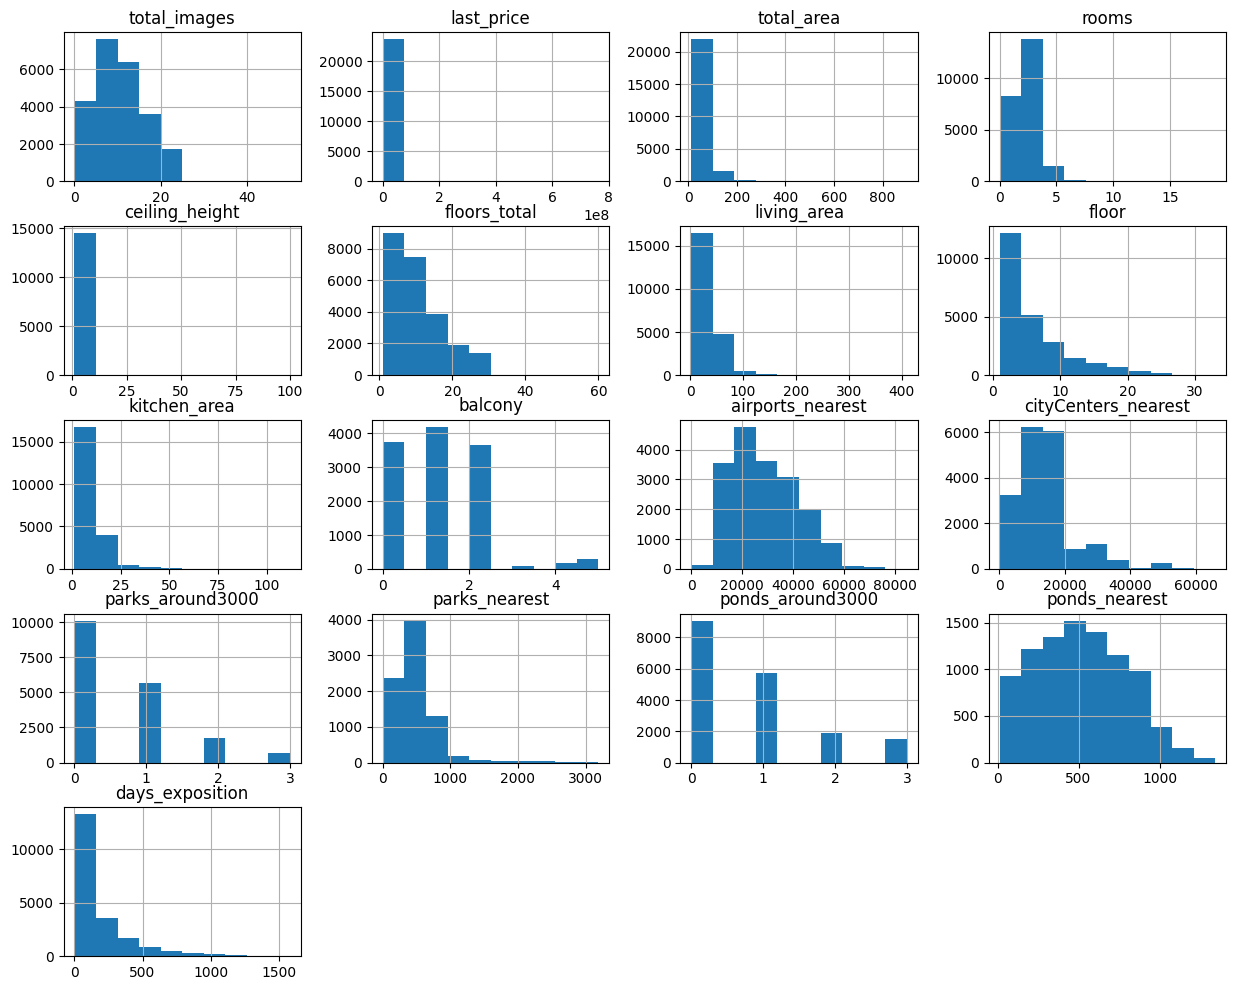

In [8]:
data.hist(figsize=(15, 12));


# 2. Предобработка данных

## 2.1 Обработка пропусков в датафрейме

In [9]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9195
floors_total,86
living_area,1903
floor,0
is_apartment,20924


###2.1.1 В датасете достаточно много столбцов с пропущенными значениями. Некоторые из них можно можно заполнить нулями: `balcony`, `parks_around3000`, `ponds_around3000`

In [10]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)

### 2.1.2 Далее обработаем столбец `is_apartment`

In [11]:
data['is_apartment'].value_counts()

,count
is_apartment,
False,2725
True,50


In [12]:
(data.loc[(data['is_apartment'].isna()) & ((data['studio'] == True) |
 (data['open_plan'] == True)), ['is_apartment', 'studio', 'open_plan']]
 .sum())

,0
is_apartment,0
studio,134
open_plan,60


In [13]:
(data.loc[(data['is_apartment'] == False), ['is_apartment', 'studio', 'open_plan']]
 .sum())

,0
is_apartment,0
studio,15
open_plan,7


In [14]:
(data.loc[(data['is_apartment'] == True), ['is_apartment', 'studio', 'open_plan']]
 .sum())

,0
is_apartment,50
studio,0
open_plan,0


In [15]:
data[(data['studio'] == True) & (data['open_plan'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Заметим что если, в одном из столбцов `is_apartment`, `studio`, `open_plan` стоит `True`, то в других стоит `False` или `None`. Значит следует в столбце `is_apartment` заменить пропуски значением `True`, если в столбцах `studio` и `open_plan` стоит `False`. Значением `False` в другом случае

In [16]:
data['is_apartment'] = data['is_apartment'].fillna((data['studio'] == False) & (data['open_plan'] == False))

<ipython-input-16-e9ff8a77e9ac>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna((data['studio'] == False) & (data['open_plan'] == False))


In [17]:
# Переводим название столбца в нижний регистр
data.rename(columns={'cityCenters_nearest': 'city_center_nearest'}, inplace=True)

### 2.1.3 Удалим данных об обьявлениях без указания района. Таких данных относительно немного в датафрейме

In [18]:
data = data[data['locality_name'].notna()]

In [19]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9160
floors_total,85
living_area,1898
floor,0
is_apartment,0


In [20]:
data.shape

(23650, 22)

## 2.2 Обработка дубликатов

In [21]:
# Явные дубликаты
data.duplicated().sum()

np.int64(0)

In [22]:
# Приводим все слова к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

In [23]:
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [24]:
# Функции для обработки неявных дубликатов

# Удаление слов, обозначающих тип населенного пункта
def strip_locality_name(loc_name):
    templates = ['поселок городского типа', 'городской поселок',
                'коттеджный поселок', 'поселок', 'деревня', 'село',
                 'садоводческое некоммерческое товарищество',
                 'садовое товарищество']

    for t in templates:
        loc_name = loc_name.replace(t, '')

    return loc_name

# Замена ё на е
def leteter_change(loc_name):
    loc_name = loc_name.replace('ё', 'е')
    return loc_name

# Удаление лишних пробелов
def space_strip(loc_name):
    loc_name = loc_name.strip()
    return loc_name

In [25]:
data['locality_name'] = data['locality_name'].apply(leteter_change)
data['locality_name_striped'] = data['locality_name'].apply(strip_locality_name)
data['locality_name_striped'] = data['locality_name_striped'].apply(space_strip)

In [26]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_striped
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,...,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,True,...,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,True,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,санкт-петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,True,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,...,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,санкт-петербург


In [27]:
data['locality_name_striped'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

## 2.3 Обработка пропусков (продолжение)

### 2.3.1 После того, как были обработаны неявные дубликаты в столбце `locality_name`, можно обработать пропуски в столбцах:
    

*   `city_center_nearest`
*   `airports_nearest`
*   `parks_nearest`
*   `ponds_nearest`

Логичнее всего заполнить пропуски в этих столбцах медианными значениями для каждого населенного пункта. Если же для всех обьявлений в конкретном населенном пункте не указано значение в столбце, тогда в нем останется пропуск



In [28]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9160
floors_total,85
living_area,1898
floor,0
is_apartment,0


In [29]:
for col in ['city_center_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']:
    for city in data['locality_name_striped'].unique():
        data.loc[(data['locality_name_striped'] == city) & (data[col].isna()), col] = \
        data.loc[data['locality_name_striped'] == city, col].median()


In [30]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,9160
floors_total,85
living_area,1898
floor,0
is_apartment,0


In [31]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_striped
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,True,...,0.0,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,503.0,49.0,санкт-петербург
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,True,...,0.0,санкт-петербург,22041.0,17369.0,0.0,460.0,1.0,374.0,251.0,санкт-петербург
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,True,...,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,санкт-петербург
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,True,...,0.0,санкт-петербург,22041.0,17369.0,0.0,460.0,1.0,374.0,123.0,санкт-петербург
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,True,...,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,санкт-петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,True,...,0.0,санкт-петербург,51340.0,15363.0,0.0,460.0,1.0,853.0,512.0,санкт-петербург
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,True,...,0.0,санкт-петербург,22041.0,17369.0,0.0,460.0,1.0,374.0,127.0,санкт-петербург
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,True,...,0.0,санкт-петербург,19095.0,4529.0,0.0,460.0,0.0,503.0,260.0,санкт-петербург
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,NaN,NaN,50.40,18,True,...,0.0,санкт-петербург,19095.0,4529.0,0.0,460.0,0.0,503.0,104.0,санкт-петербург


После всех преобразований, все еще в данных остаются столбцы с пропусками. На данный момент, нет основания удалять записи с пропусками. Также нет логичного способа заполнить пропуски определенными значениям. Дальше рассмотрим отдельно каждые столбцы, проанлизируем их основные метрики и возможно это прольет некоторый свет на природу пропусков, что позволит от них избавиться


## 2.4 Изменение типов данных

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
# data['days_exposition'] = data['days_exposition'].astype('int', errors='ignore')
data['balcony'] = data['balcony'].astype('int', errors='ignore')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23650 non-null  int64         
 1   last_price             23650 non-null  float64       
 2   total_area             23650 non-null  float64       
 3   first_day_exposition   23650 non-null  datetime64[ns]
 4   rooms                  23650 non-null  int64         
 5   ceiling_height         14490 non-null  float64       
 6   floors_total           23565 non-null  float64       
 7   living_area            21752 non-null  float64       
 8   floor                  23650 non-null  int64         
 9   is_apartment           23650 non-null  bool          
 10  studio                 23650 non-null  bool          
 11  open_plan              23650 non-null  bool          
 12  kitchen_area           21381 non-null  float64       
 13  balcon

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_striped
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,санкт-петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,санкт-петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,True,...,2,поселок шушары,12817.0,18603.0,0,NaN,0,584.5,81.0,шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,True,...,0,санкт-петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,санкт-петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,True,...,0,санкт-петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,санкт-петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,санкт-петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,санкт-петербург


 ## 2.5 Обработка аномалий в данных. Анализ конкретных столбцев и их метрик

### 2.5.1 Рассмотрим столбец `ceiling_height`

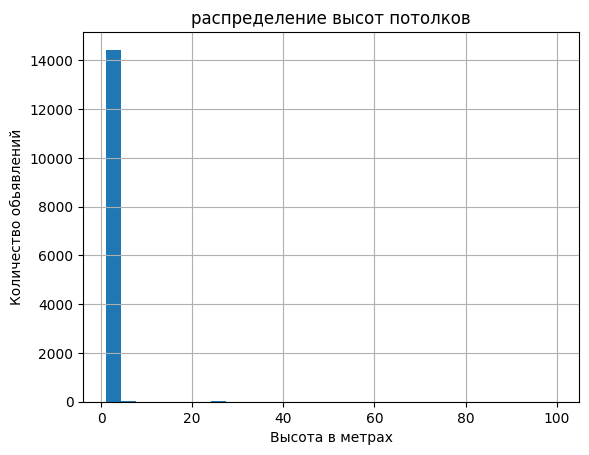

In [35]:
data['ceiling_height'].hist(bins=30);
plt.title('распределение высот потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество обьявлений')
plt.show()

Видим, что в основном все квартиры с потолками от 2.5 до 5 метров. Хотя встречаются квартиры с потолками около 100 метров, что явно является какой-то ошибкой

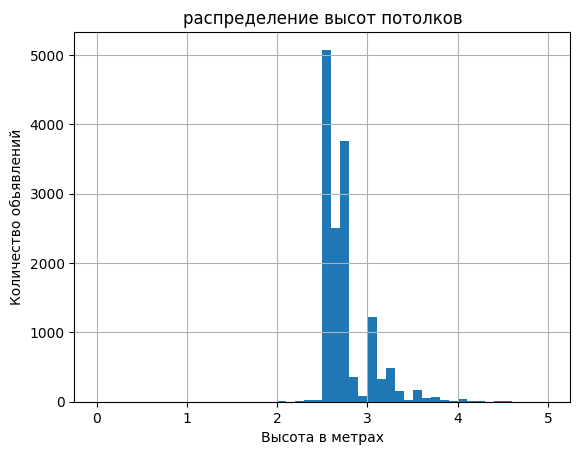

In [36]:
data['ceiling_height'].hist(bins=50, range=(0, 5))
plt.title('распределение высот потолков')
plt.xlabel('Высота в метрах')
plt.ylabel('Количество обьявлений')
plt.show()

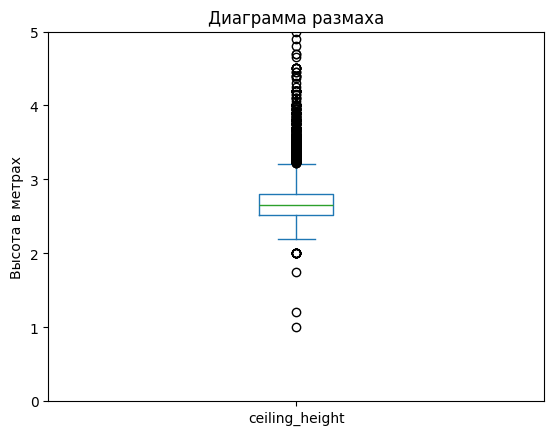

In [37]:
data['ceiling_height'].plot(kind='box', ylim=(0, 5))
plt.title('Диаграмма размаха')
plt.xlabel('')
plt.ylabel('Высота в метрах')
plt.show()

Из графика выше видим, большенство квартир находятся в пределах от 2.5 метров и примерно до 3.5. Все остальное считается аномалиями.

In [38]:
extra_low_ceiling_ratio = (data['ceiling_height'] < 2.5).sum() / data['ceiling_height'].notnull().sum()
print(f'доля очень низких потолков {extra_low_ceiling_ratio:.2%}')
extra_large_ceiling_ratio = (data['ceiling_height'] > 5).sum() / data['ceiling_height'].notnull().sum()
print(f'доля очень высоких потолков {extra_large_ceiling_ratio:.2%}')

доля очень низких потолков 0.50%
доля очень высоких потолков 0.25%


Доли эксртемальных значений высот потолков небольшые относительно имеющихся данных, в которых нет пропусков. Исключим эти данные из выборки

In [39]:
# Исключаем квартиры с аномальными значениями высот потолков
data = data[(data['ceiling_height'].isna()) | ((data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 5))]

In [40]:
data['ceiling_height'].describe()

,ceiling_height
count,14381.000000
mean,2.727001
std,0.270732
min,2.500000
25%,2.520000
50%,2.650000
75%,2.800000
max,5.000000


Из основных описательных статистик видно, что среднее особо не отличается от медиаы. А также невелико среднее отклонение. Исходя из этого можно попробовать заменить пропущенные значения высот потолков на среднее имеющихся данных. Данное преоброзавание логично, так как большинство домов строятся с потолками до 3 метров

In [41]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].mean()

### 2.5.2 Рассмотрим столбец `total_area`

In [42]:
data['total_area'].describe()

,total_area
count,23541.000000
mean,60.332799
std,35.573613
min,12.000000
25%,40.000000
50%,52.000000
75%,69.900000
max,900.000000


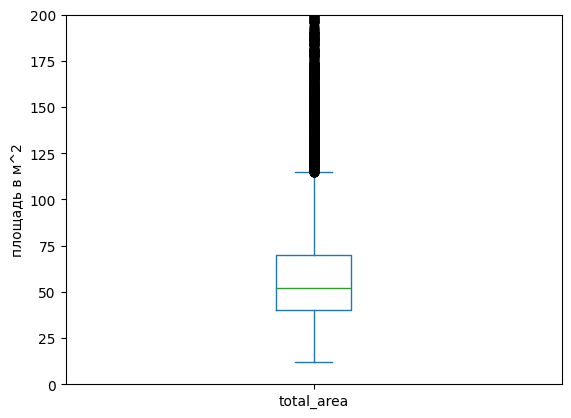

In [43]:
data['total_area'].plot(kind='box')
plt.ylim(0, 200)
plt.ylabel('площадь в м^2')
plt.show()

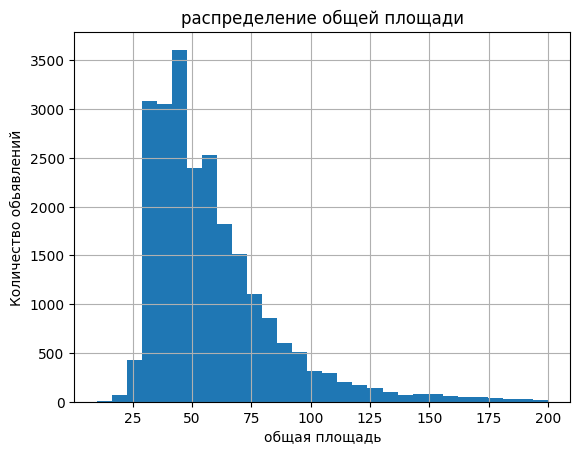

In [44]:
data['total_area'].hist(bins=30, range=(10, 200))
plt.title('распределение общей площади')
plt.xlabel('общая площадь')
plt.ylabel('Количество обьявлений')
plt.show()

Из графиков и основных описательных статистик видно что в среднем квартиры около 55 метров по общей площади. Однако для ообщей площади характерно большое среднеквадратичное отклонение. Так из диаграммы размаха видно, что квартиры с общей площадью более 120 метров являются выбросами. Посчитаем долю таких выбросов

In [45]:
f'{len(data[data["total_area"] >= 120]) / len(data):.2%} квартир с общей площадью не менее 120 м^2'

'4.63% квартир с общей площадью не менее 120 м^2'

In [46]:
f'{len(data[data["total_area"] >= 200]) / len(data):.2%} квартир с общей площадью не менее 200 м^2'

'0.97% квартир с общей площадью не менее 200 м^2'

Кквартиры до 120 м^2 вполне себе существуют, более 150 уже сложно себе представить. Обьявлений, где квартира площадью более 200, около 1%, что в принципе немного относительно исходной выборки. Целесообразно избавиться от квартир с общей площадью более 200 м^2. Замки рассматривать не будем

In [47]:
data = data[data['total_area'] <= 200]

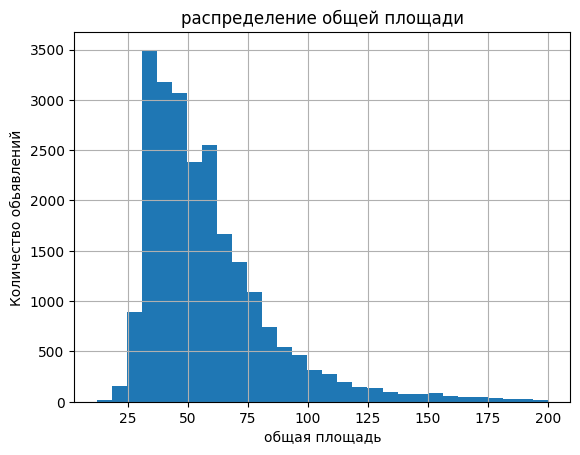

In [48]:
data['total_area'].hist(bins=30)
plt.title('распределение общей площади')
plt.xlabel('общая площадь')
plt.ylabel('Количество обьявлений')
plt.show()

### 2.5.3 Рассмотрим столбец `rooms`

In [49]:
# Уникальные значения количества комнат в квартире
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0, 11,  7,  8])

In [50]:
# Рспредление долей квартир по количеству комнат в процентах
data_rooms_grouped = data.groupby('rooms')['rooms'].count() / len(data) * 100
data_rooms_grouped.name = 'percentage'
data_rooms_grouped

,percentage
rooms,
0,0.832011
1,34.326886
2,33.786508
3,24.703006
4,4.846250
5,1.136510
6,0.265900
7,0.085774
8,0.008577


Видими, что в основном квартиры от 1 до 5 комнта. больше 5 уже редкость хотя и такое возможно. 0 комнат также допустимый варинат - это студии. Есть смысл избавиться от немногочисленных обьявлений с комнатами больше 7

In [51]:
data = data[data['rooms'] <= 6]

### 2.5.3 Рассмотрим столбец `living_area`

In [52]:
data['living_area'].describe()

,living_area
count,21431.000000
mean,33.160400
std,17.168303
min,2.000000
25%,18.500000
50%,30.000000
75%,42.000000
max,164.700000


Удалим квартиры в которых жилая площадь меньше 15 квадратов

In [53]:
data = data[(data['living_area'].isna()) | (data['living_area'] >= 15)]

### 2.5.4 Рассмотрим столбец `last_price`

In [54]:
data['last_price'].describe()

,last_price
count,2.259000e+04
mean,6.082958e+06
std,6.254674e+06
min,1.219000e+04
25%,3.450000e+06
50%,4.660200e+06
75%,6.750000e+06
max,3.300000e+08


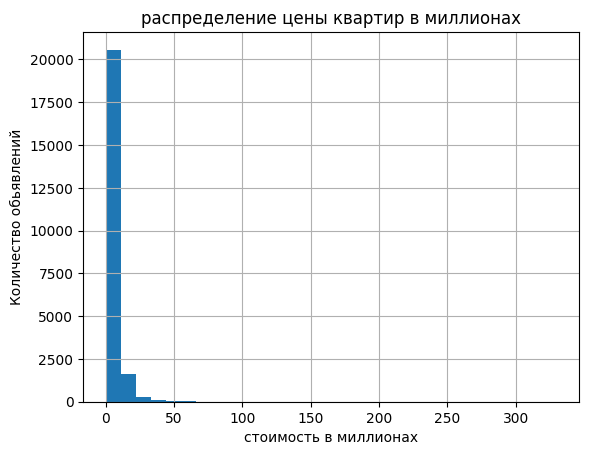

In [55]:
data['last_price'].apply(lambda x: x / 1_000_000).hist(bins=30)
plt.title('распределение цены квартир в миллионах')
plt.xlabel('стоимость в миллионах')
plt.ylabel('Количество обьявлений')
plt.show()

Видим, что у распределения цены на квартиры есть достаточно выбивающиеся значения, которые больше 50 млн рублей. В основном же квартиры торгуются до 25 млн рублей.

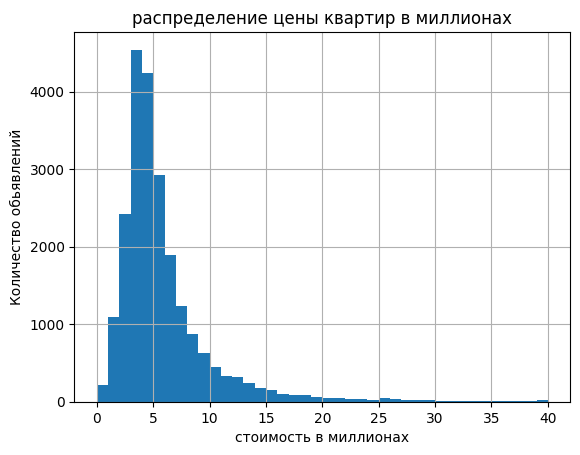

In [56]:
data['last_price'].apply(lambda x: x / 1_000_000).hist(bins=40, range=(0, 40))
plt.title('распределение цены квартир в миллионах')
plt.xlabel('стоимость в миллионах')
plt.ylabel('Количество обьявлений')
plt.show()

Посчитаем долю квартир, которые торгуются боле 40 млн

In [57]:
f'{len(data[data["last_price"] > 25_000_000]) / len(data):.2%} квартир дороже 25 млн'

'1.32% квартир дороже 25 млн'

Удалим сверхдорогие квартиры свыше 30 млн.

In [58]:
data = data[data['last_price'] <= 25_000_000]

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22291 entries, 0 to 23697
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           22291 non-null  int64         
 1   last_price             22291 non-null  float64       
 2   total_area             22291 non-null  float64       
 3   first_day_exposition   22291 non-null  datetime64[ns]
 4   rooms                  22291 non-null  int64         
 5   ceiling_height         22291 non-null  float64       
 6   floors_total           22216 non-null  float64       
 7   living_area            20467 non-null  float64       
 8   floor                  22291 non-null  int64         
 9   is_apartment           22291 non-null  bool          
 10  studio                 22291 non-null  bool          
 11  open_plan              22291 non-null  bool          
 12  kitchen_area           20165 non-null  float64       
 13  balcon

### 2.5.5 Удалим немногочисленные пропуски в `floors_total`

In [60]:
data = data[data['floors_total'].notna()]

### 2.5.6 Обработка столбца `airports_nearest`

In [61]:
data['airports_nearest'].describe()

,airports_nearest
count,17575.000000
mean,29520.756330
std,13122.512316
min,0.000000
25%,18641.000000
50%,27381.000000
75%,38854.000000
max,84869.000000


 Заметим, что есть данные с расстоянием до аэропорта в 0 метров. Это явно аномалии. Исключим их

In [62]:
len(data[data['airports_nearest'] >= 100])

17574

In [63]:
data = data[(data['airports_nearest'].isna()) | (data['airports_nearest'] >= 300)]

In [64]:
data.reset_index(drop=True, inplace=True)

### 2.5.7 Пропуски в столбце `city_center_nearest`

Для дальнейшего анализа нам также будет необходим столбец с расстоянием до центра города. К сожалению в нем достаточно много пропусков, поэтому есть смысл сделать срез по данным, где в этом поле не стоит пропуск. Также можно отдельно проанлизировать те обьявления, в которых расстояние до центра города не указано

In [65]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,1791
floor,0
is_apartment,0


In [66]:
df_no_city_center = data[data['city_center_nearest'].isna()]

In [67]:
df_no_city_center.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,529
floor,0
is_apartment,0


Заметим, что срезав данные по столбцу `city_nearest_center` мы также сможем избавиться от многочисленных пропусков в других столбцах

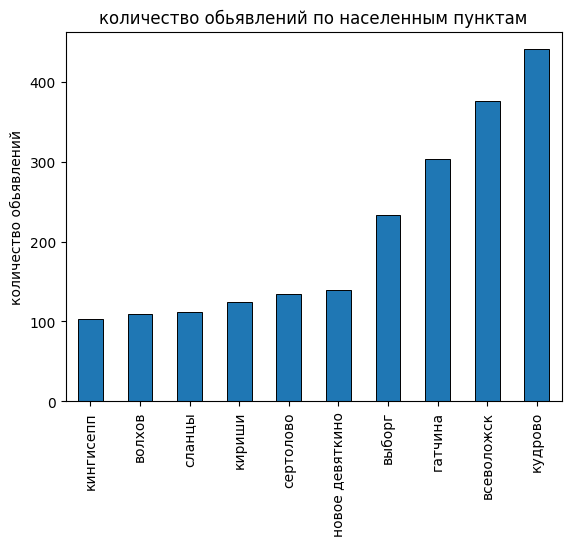

In [68]:
df_grouped = df_no_city_center.groupby('locality_name_striped')['locality_name_striped'].count()
df_grouped.name = 'amount_of_exposition'
(df_grouped
 .sort_values(ascending=True)
 .tail(10)
 .plot(kind='bar', edgecolor='black', linewidth=0.7)
)
plt.title('количество обьявлений по населенным пунктам')
plt.xlabel('')
plt.ylabel('количество обьявлений')
plt.show()

из столбчатой диаграммы видно, что в выборку не входит Санкт-петербург, но входят досточно крупные населенные пункты в пределах Ленинградской области

In [69]:
df_grouped.sort_values(ascending=False).head(30)

,amount_of_exposition
locality_name_striped,
кудрово,441
всеволожск,376
гатчина,303
выборг,233
новое девяткино,139
сертолово,134
кириши,124
сланцы,112
волхов,109


Исходя из проведенного выше анализа, для многих достаточно крупных населенных пунктов в пределах области не для одного из обьявлений не указано расстояние до центра города. Эти пропуски можно заполнить примерным расстоянием от конкретного населенного пункта до Санкт-Петербурга. Либо же срезать эти данные и при необходимости проанализировать отдельно.

## 2.6 Выводы

По результатам предобработки данных были заполнены многочисленны пропуски в исходных данных, где это было возможно. Например расстояние до аэропорта, парка, водоема была заменено на среднее расстояние до одного из этих обьектов от конкретного населенного пункта. Тем не менее, не все пропуски таким образом удалось заполнить, что может говорить о том, что нет каких то картографических данных для целого райна размещения обьявления.

Также в данных можно встретить пропуски в столбцах, которые заполнял размещающие обьявления люди. Часто не указана жилая площадь, площадь кухни и размер потолков. Такие пропуски можно обьяснить тем, что люди забывают или вовсе не считают нужным указать данные параметры (достаочно указать общую площадь, о чем говорит отсутствие пропусков в столбце с этим параметром)

Были также обработаны выбивающиеся из данных немногочисленные значения некоторых столбцов. ИСключены из выборки сверхдорогие квартиры свыше 25 млн, квартиры, где комнат более 7.

Также исходя из анализа, было решено заменить достаточно много пропусков в столбце с размерами потолков, средними значениями

В данных остались пропуски, которые невозможно логически заполнить. Удаление таких данны может весьма исказить анализ

# 3. Исследовательский анализ данных

## 3.1 Добавление новых столбцов в датафрейм

* цена одного квадратного метра
* день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры (значения — "первый", "последний", "другой");
* расстояние до центра города в километрах округленное до целого.

In [70]:
data['price_per_sqrt_m'] = (data['last_price'] / data['total_area']).round(2)

In [71]:
data['day_of_exposition'] = data['first_day_exposition'].dt.day

In [72]:
data['month_of_exposition'] = data['first_day_exposition'].dt.month

In [73]:
data['year_of_exposition'] = data['first_day_exposition'].dt.year

In [74]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [75]:
data['floor_type'] = data.apply(floor_type, axis=1)

In [76]:
data['distance_city_center_km'] = data['city_center_nearest'] / 1000

In [77]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_striped,price_per_sqrt_m,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,distance_city_center_km
18736,6,1650000.0,42.7,2017-10-27,2,2.500000,4.0,29.2,2,True,...,0,NaN,551.0,волосово,38641.69,27,10,2017,другой,NaN
4155,5,3750000.0,33.0,2017-08-29,1,2.600000,16.0,16.5,15,True,...,0,503.0,219.0,санкт-петербург,113636.36,29,8,2017,другой,13.365
1811,12,4646000.0,33.6,2016-06-10,1,2.727001,10.0,21.2,10,True,...,2,428.0,213.0,санкт-петербург,138273.81,10,6,2016,последний,5.879
21305,7,2950000.0,64.0,2018-02-25,3,2.500000,5.0,45.0,4,False,...,0,NaN,182.0,выборг,46093.75,25,2,2018,другой,NaN
7988,5,1250000.0,36.0,2016-04-19,1,2.727001,5.0,16.0,2,True,...,0,NaN,750.0,волхов,34722.22,19,4,2016,другой,NaN
19291,20,4900000.0,62.0,2017-08-08,3,2.727001,9.0,39.0,8,True,...,0,503.0,60.0,санкт-петербург,79032.26,8,8,2017,другой,15.819
21717,4,5950000.0,59.0,2016-05-22,2,2.727001,17.0,NaN,5,True,...,0,503.0,91.0,санкт-петербург,100847.46,22,5,2016,другой,11.781
20687,4,3500000.0,45.0,2016-06-06,1,2.900000,10.0,18.2,8,False,...,0,NaN,468.0,колтуши,77777.78,6,6,2016,другой,NaN
5202,20,3300000.0,53.8,2017-10-01,2,2.500000,5.0,28.5,3,True,...,0,NaN,NaN,шлиссельбург,61338.29,1,10,2017,другой,NaN
18439,4,8299000.0,86.2,2018-10-16,4,3.060000,6.0,59.7,2,True,...,0,503.0,NaN,санкт-петербург,96276.10,16,10,2018,другой,3.419


## 3.2 Анализ отдельных столбцов

In [78]:
data.isna().sum()

,0
total_images,0
last_price,0
total_area,0
first_day_exposition,0
rooms,0
ceiling_height,0
floors_total,0
living_area,1791
floor,0
is_apartment,0


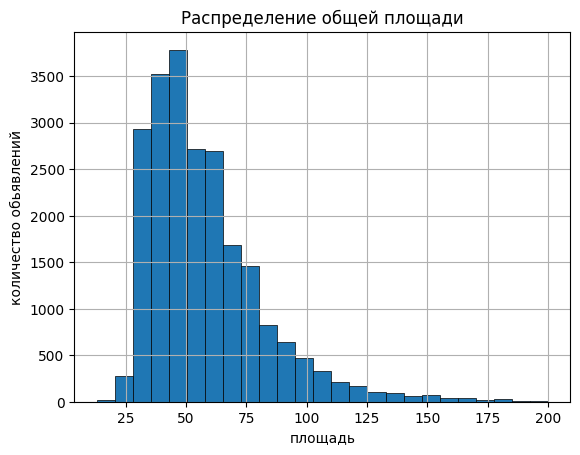

In [79]:
data['total_area'].hist(bins=25, edgecolor='black', linewidth=0.5)
plt.title('Распределение общей площади')
plt.xlabel('площадь')
plt.ylabel('количество обьявлений')
plt.show()

В среднем общая площадь квартир около 50 квадратных метро. Но распредление общей площади смещено вправо, так как есть квартиры общей площадью боле 100 квадратных метров

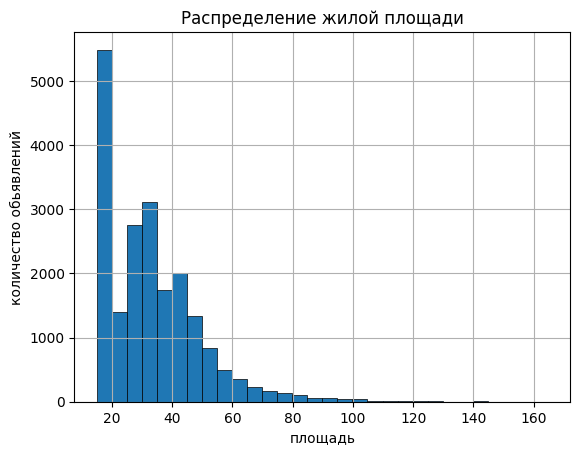

In [80]:
data['living_area'].hist(bins=30, edgecolor='black', linewidth=0.5)
plt.title('Распределение жилой площади')
plt.xlabel('площадь')
plt.ylabel('количество обьявлений')
plt.show()

Распределение с жилой площадью выглядит очень странно. Наблюдаются квартиры с очень большой жилой площадью. А также можно отметить пик квартир с жил площадью от 15 до 20 м^2 и затем провал.

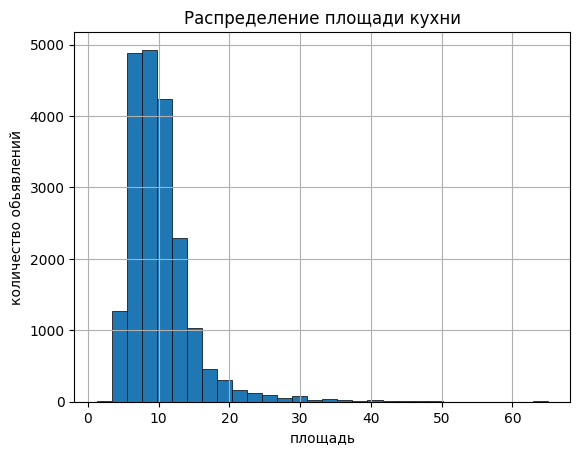

In [81]:
data['kitchen_area'].hist(bins=30, edgecolor='black', linewidth=0.5)
plt.title('Распределение площади кухни')
plt.xlabel('площадь')
plt.ylabel('количество обьявлений')
plt.show()

рапсределение площади кухни выглядит достаточно равномерно. Большинство кухонь в среднем 10 метров квадртных по площади. Однако встречаются квартиры с кухнями окло 30 квадратных метров.

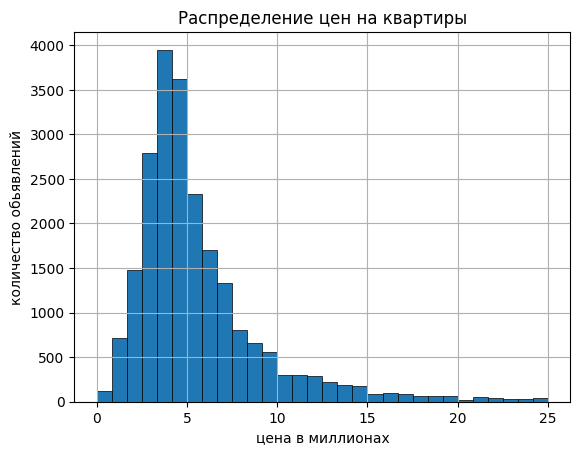

In [82]:
data['last_price'].apply(lambda x: x / 1_000_000).hist(bins=30, edgecolor='black', linewidth=0.5)
plt.title('Распределение цен на квартиры')
plt.xlabel('цена в миллионах')
plt.ylabel('количество обьявлений')
plt.show()

Распределение цен на квартиры дотаточно равномерное со смещением вправо. Средняя квартира торгуется по 5млн

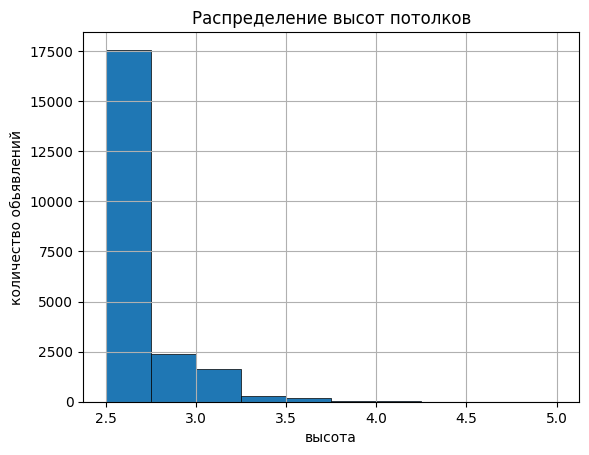

In [83]:
data['ceiling_height'].hist(bins=10, edgecolor='black', linewidth=0.5)
plt.title('Распределение высот потолков')
plt.xlabel('высота')
plt.ylabel('количество обьявлений')
plt.show()

В распределении высот потолков видно что большинство потолков от 2.5 до 3 метров. Встречаются также квартиры с высокими потолками до 5 метров, что вполне соответствует действительности

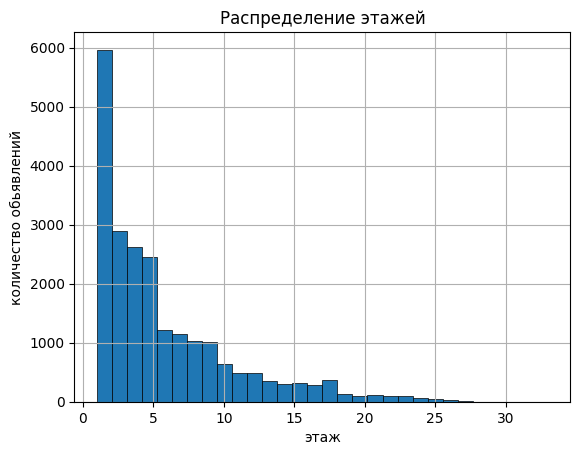

In [84]:
data['floor'].hist(bins=30, edgecolor='black', linewidth=0.5)
plt.title('Распределение этажей')
plt.xlabel('этаж')
plt.ylabel('количество обьявлений')
plt.show()

Видно что в основном квартиры продаются в домах, в которых 5 или 9 этажей. Реже в более высоких

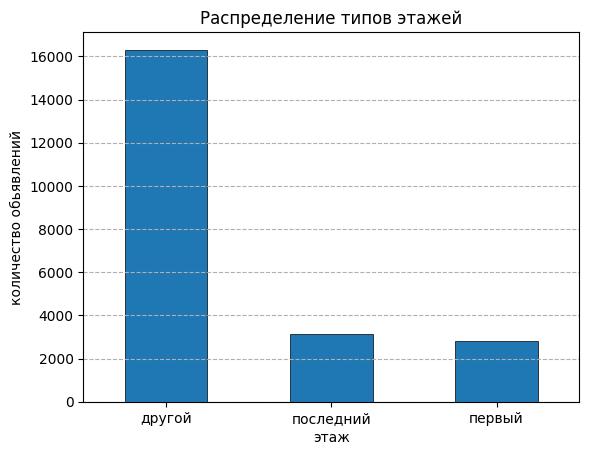

In [85]:
data['floor_type'].value_counts().plot(kind='bar', edgecolor='black', linewidth=0.5)
plt.title('Распределение типов этажей')
plt.xlabel('этаж')
plt.ylabel('количество обьявлений')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()

Видим что обявлений, в которых продается недвижимость на первом или на последнем этаже примерно поровну. В основном этаж находится где-то между

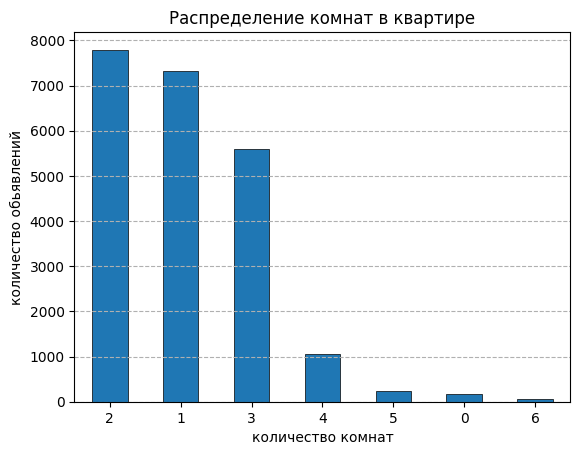

In [86]:
data['rooms'].value_counts().plot(kind='bar', edgecolor='black', linewidth=0.5)
plt.title('Распределение комнат в квартире')
plt.xlabel('количество комнат')
plt.ylabel('количество обьявлений')
plt.grid(axis='y', linestyle='--')
plt.xticks(rotation=0)
plt.show()



Из столбчатой диграммы видим, что чем больше комнат, тем меньше обьявлений. Не работает это правило только для обьявлений с количеством комнат равным одной. Таких обьявлений чуть меньше, чем обьявлений с двумя комнатами

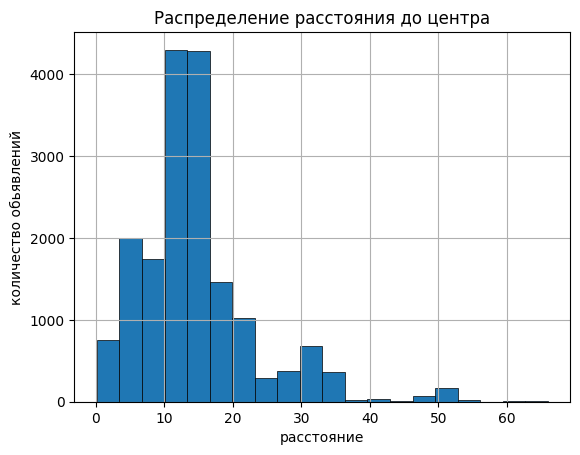

In [87]:
data['distance_city_center_km'].hist(bins=20, edgecolor='black', linewidth=0.5)
plt.title('Распределение расстояния до центра')
plt.xlabel('расстояние')
plt.ylabel('количество обьявлений')
plt.show()

В среднем центр города находится в пределах 15 километров. Есть также обьявления, где расстояние свыше 30 километров

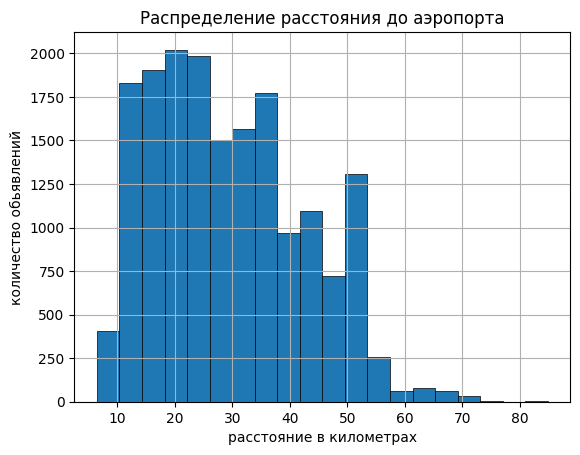

In [88]:
data['airports_nearest'].apply(lambda x: x / 1_000).hist(bins=20, edgecolor='black', linewidth=0.5)
plt.title('Распределение расстояния до аэропорта')
plt.xlabel('расстояние в километрах')
plt.ylabel('количество обьявлений')
plt.show()

Видим, что расстояние до аэропорта распределено достаточно равномерно. Среднее расстояние до аэропорта около 30 км

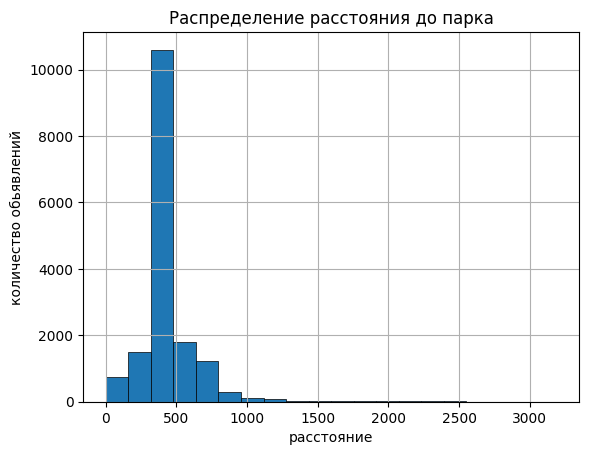

In [89]:
data['parks_nearest'].hist(bins=20, edgecolor='black', linewidth=0.5)
plt.title('Распределение расстояния до парка')
plt.xlabel('расстояние')
plt.ylabel('количество обьявлений')
plt.show()

Видим что расстояние до парка не превышает 2500 метров для большинства обьявлений. А в среднем в парк можно попасть, пройдя всего 400 метров

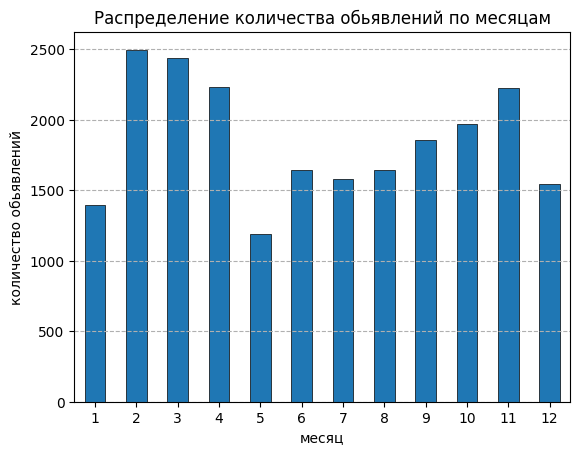

In [90]:
(data['month_of_exposition']
 .value_counts()
 .sort_index()
 .plot(kind='bar', edgecolor='black', linewidth=0.5)
)

plt.title('Распределение количества обьявлений по месяцам')
plt.xlabel('месяц')
plt.ylabel('количество обьявлений')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

 Видно, что квартиры выставляются на продажу в основном с февраля по апрель, а также с августа по ноябрь. меньше всего обьявлений в январь, май и декабрь.

## 3.3 Как быстро продаются квартиры

In [91]:
# Выводим основные описательные статистики
data['days_exposition'].describe()

,days_exposition
count,19271.000000
mean,179.268071
std,218.021226
min,1.000000
25%,45.000000
50%,95.000000
75%,229.000000
max,1580.000000


Из описательных статистик видно что медиана, достаточно сильно отличается от среднего, что может свидетельствовать о больших выбросах. Также весьма велико стандартное отклонение.

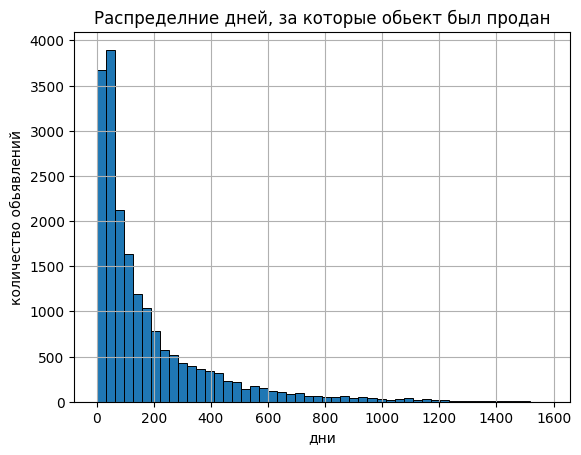

In [92]:
data['days_exposition'].hist(bins=50, edgecolor='black', linewidth=0.7)
plt.title('Распределние дней, за которые обьект был продан')
plt.xlabel('дни')
plt.ylabel('количество обьявлений')
plt.show()

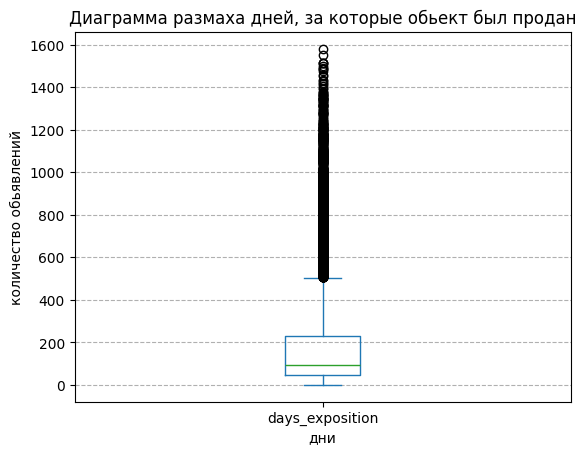

In [93]:
data['days_exposition'].plot(kind='box')
plt.title('Диаграмма размаха дней, за которые обьект был продан')
plt.xlabel('дни')
plt.ylabel('количество обьявлений')
plt.grid(axis='y', linestyle='--')
plt.show()

Из графиков видно, что в основном недвижимость продается не дольше 2х лет. Все обьявления, которые были сняты спустя более чем 500 дней являются выбросами

In [94]:
print(f'{len(data[data["days_exposition"] > 500]) / len(data):.2%} обьектов продавались более 500 дней')

7.25% обьектов продавались более 500 дней


In [95]:
#Удаляем выбросы
data = data[data['days_exposition'] <= 500]

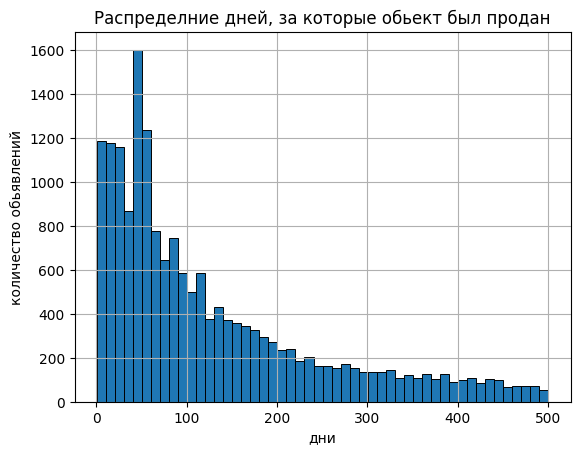

In [96]:
data['days_exposition'].hist(bins=50, edgecolor='black', linewidth=0.7)
plt.title('Распределние дней, за которые обьект был продан')
plt.xlabel('дни')
plt.ylabel('количество обьявлений')
plt.show()

После того как аномалии убраны, можно разглядеть странный провал в области от 0 до 100 дней. Рассмотри этот интервал отдельно

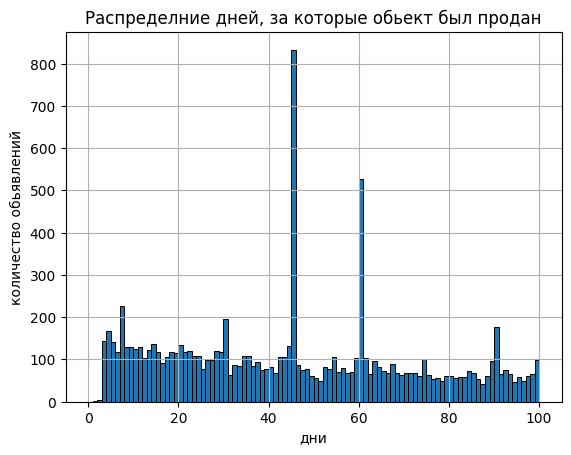

In [97]:
data['days_exposition'].hist(bins=100, edgecolor='black', linewidth=0.7, range=(0, 100))
plt.title('Распределние дней, за которые обьект был продан')
plt.xlabel('дни')
plt.ylabel('количество обьявлений')
plt.show()

за 100 дне обьекты достаточно равномерно продаются, однако видно два высоких пика на отметках в 45 и 60 дней.

In [98]:
data['days_exposition'].quantile([0.33, 0.66])

,days_exposition
0.33,48.0
0.66,136.0


Подажи обьекта можно оценить так:
* до 48 дней - быстрая продажа
* до 136 дней - средняя
* более 136 - долгая

## 3.4 Какие факторы больше всего влияют на стоимость

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17660 entries, 1 to 22212
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             17660 non-null  int64         
 1   last_price               17660 non-null  float64       
 2   total_area               17660 non-null  float64       
 3   first_day_exposition     17660 non-null  datetime64[ns]
 4   rooms                    17660 non-null  int64         
 5   ceiling_height           17660 non-null  float64       
 6   floors_total             17660 non-null  float64       
 7   living_area              16123 non-null  float64       
 8   floor                    17660 non-null  int64         
 9   is_apartment             17660 non-null  bool          
 10  studio                   17660 non-null  bool          
 11  open_plan                17660 non-null  bool          
 12  kitchen_area             15852 non-nu

In [100]:
corr_param = [
    'last_price',
    'total_area',
    'rooms',
    'city_center_nearest',
    'day_of_exposition',
    'month_of_exposition',
    'year_of_exposition'
    ]

corr_labels = [
    'стоимость квартиры',
    'общая площадь квартиры',
    'количество комнат',
    'расстояние\nдо центра города',
    'публикация объявления\nдень',
    'публикация объявления\nмесяц',
    'публикация объявления\nгод'
    ]

In [101]:
# Получаем матрицу корреляции
corr_matrix = data[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,last_price,total_area,rooms,city_center_nearest,day_of_exposition,month_of_exposition,year_of_exposition
last_price,1.000000,0.770320,0.483696,-0.356657,0.002111,0.001917,-0.016683
total_area,0.770320,1.000000,0.788707,-0.208266,0.001286,0.000846,-0.068903
rooms,0.483696,0.788707,1.000000,-0.149396,0.003223,-0.001368,-0.054708
city_center_nearest,-0.356657,-0.208266,-0.149396,1.000000,0.012118,-0.014105,0.018594
day_of_exposition,0.002111,0.001286,0.003223,0.012118,1.000000,-0.002105,-0.050580
month_of_exposition,0.001917,0.000846,-0.001368,-0.014105,-0.002105,1.000000,-0.226736
year_of_exposition,-0.016683,-0.068903,-0.054708,0.018594,-0.050580,-0.226736,1.000000


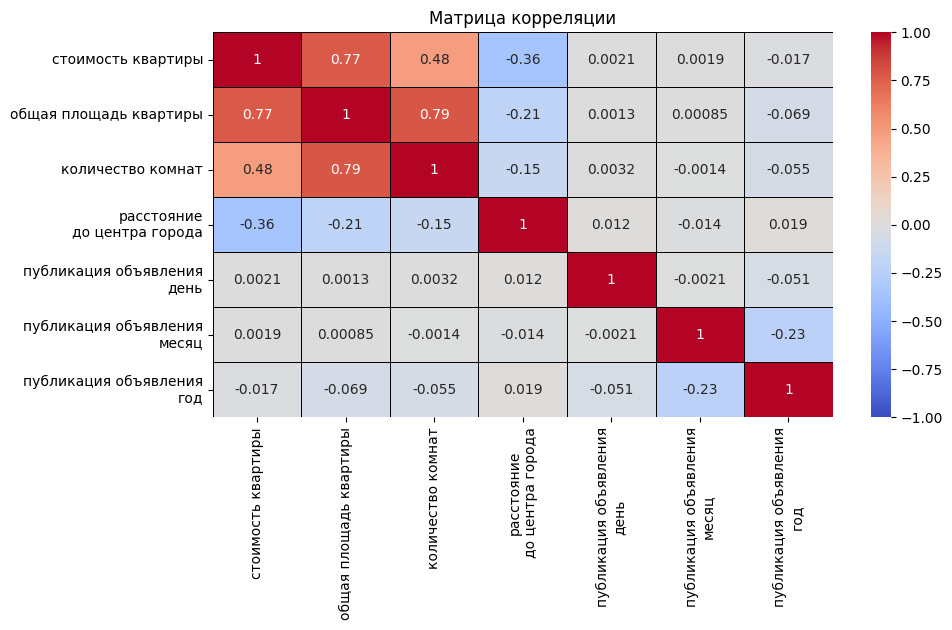

In [102]:
# Визуализируем матрицу корреляции
plt.figure(figsize = (10, 5))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', annot=True,
            yticklabels=corr_labels,
            xticklabels=corr_labels,
            linewidth=0.5,
            linecolor='black')
plt.title('Матрица корреляции')
plt.show()

Из тепловой карты видим, что присутствует положительная линейная взаимосвязь между общей площадью и стоимостью квартиры, между количеством комнта и стоимостью - вполне логично. Также видим некую линейную отрицательную взаимосвязь между ценой и расстоянием до центра города (что тоже логично - чем больше расстояние, тем меньше цена). Вмдно что цена линейно не зависит от дня, месяца или года размещения

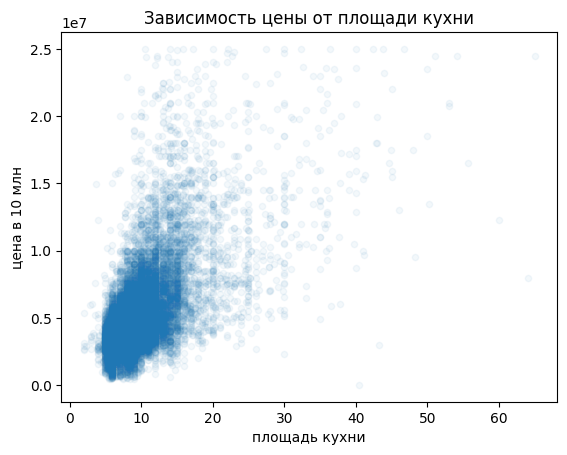

In [103]:
data.plot(kind='scatter',
          y='last_price',
          x='kitchen_area',
          alpha=0.05)
plt.title('Зависимость цены от площади кухни')
plt.xlabel('площадь кухни')
plt.ylabel('цена в 10 млн')
plt.show()

Из диаграммы рассеяния виднна линейная положительная взаимосвязь между площадью кухни и ценой. Основная масса квартир с ценой до 12 миллионов и площадью кухни до 15 метров

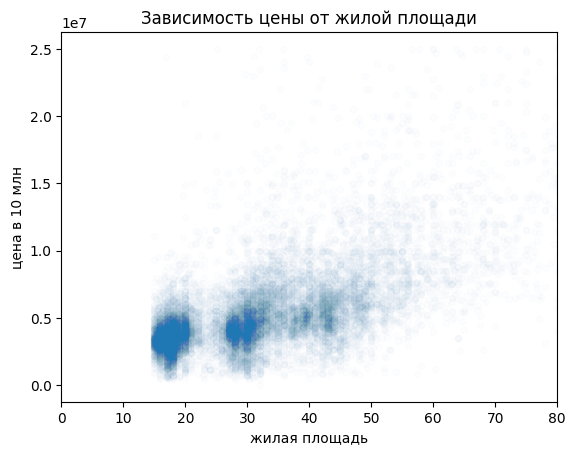

In [104]:
data.plot(kind='scatter',
          y='last_price',
          x='living_area',
          alpha=0.01)
plt.title('Зависимость цены от жилой площади')
plt.xlabel('жилая площадь')
plt.ylabel('цена в 10 млн')
plt.xlim(0, 80)
plt.show()

На данноос графике выделяются два отдельных скопления. Первое в дмапозоне до 20 м по жилой площади и стоимостью до 5 миллионов. Далее идет пустая область от 20 до 27 метров по жилой площади и вновь облако обьявлений псоле значения в 27 метров квадратных жилой площади

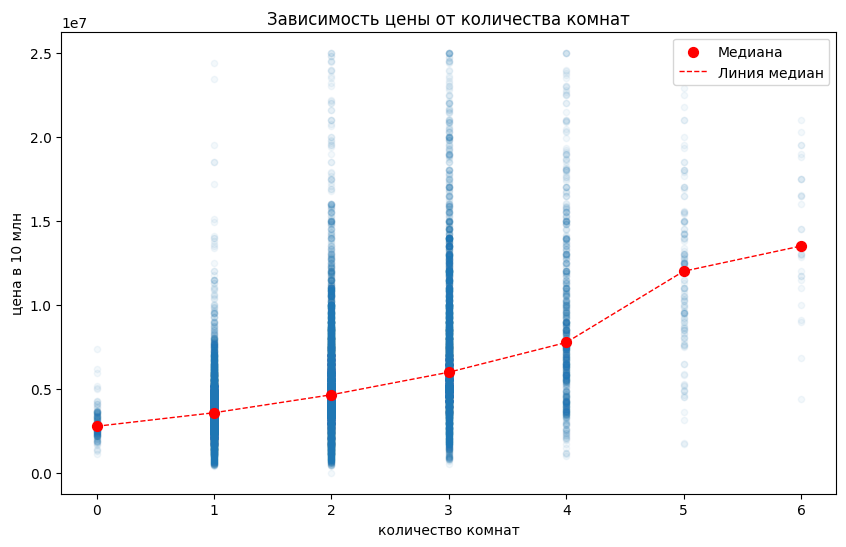

In [105]:
# Построение scatter plot
data.plot(kind='scatter', y='last_price', x='rooms', alpha=0.05, figsize=(10, 6))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена в 10 млн')

# Рассчет медиан для каждого количества комнат
median_prices = data.groupby('rooms')['last_price'].median().reset_index()

# Добавление точек медиан на график
plt.scatter(median_prices['rooms'], median_prices['last_price'], color='red', s=50, label='Медиана')

# Соединение точек линией
plt.plot(median_prices['rooms'], median_prices['last_price'], color='red', linestyle='--', linewidth=1, label='Линия медиан')

# Добавление легенды
plt.legend()

# Отображение графика
plt.show()

Из данного графика видно положительная линейная взаимосвязь между количеством комнат и ценой. В основном в обьявлениях квартиры имею от 1 до 4 комнат и стоят от 3 до 15 млн

In [106]:
df_type_floor = (data
 .pivot_table(index='floor_type', values='last_price', aggfunc=['median', 'mean', 'count'])
)
df_type_floor.columns = ['median', 'mean', 'count']
df_type_floor[['median', 'mean']] = df_type_floor[['median', 'mean']].apply(lambda x: round(x / 1_000_000, 2), axis=1)
df_type_floor

,median,mean,count
floor_type,,,
другой,4.65,5.57,13117
первый,3.80,4.27,2142
последний,4.19,5.07,2401


Из сводной таблички видим, что первый этаж самый непопулрный по количеству обьявлени. Также квартиры на первом этаже в среднем стоят дешевле, чем на любом другом. Самый популярный тип этажей, он же самый многочисленный - другой.

## 3.5 Средняя стоимость одного квадратного метра в зависимости от района с наибольшим числом обьявлений

In [107]:
# Создаем свобную таблицу где для каждого города будет
# отображено количество обьявлений и средняя цена одного м^2
# данные отсортируем по убыванию количества обьявлений

data_city_grouped = (data
                     .pivot_table(index='locality_name_striped',
                                  values='price_per_sqrt_m',
                                  aggfunc=['count', 'mean'])
                     )
data_city_grouped.columns = ['count', 'mean']
data_city_grouped = (data_city_grouped
                     .sort_values(['count', 'mean'],
                                ascending=[False, False])
                     .head(10)
                    )
data_city_grouped

,count,mean
locality_name_striped,,
санкт-петербург,11705,107531.620234
мурино,447,84936.153557
кудрово,376,94122.564840
шушары,355,76413.960282
всеволожск,290,68570.293172
колпино,286,74491.124895
пушкин,264,100847.359735
гатчина,242,68313.177603
парголово,240,87387.468042


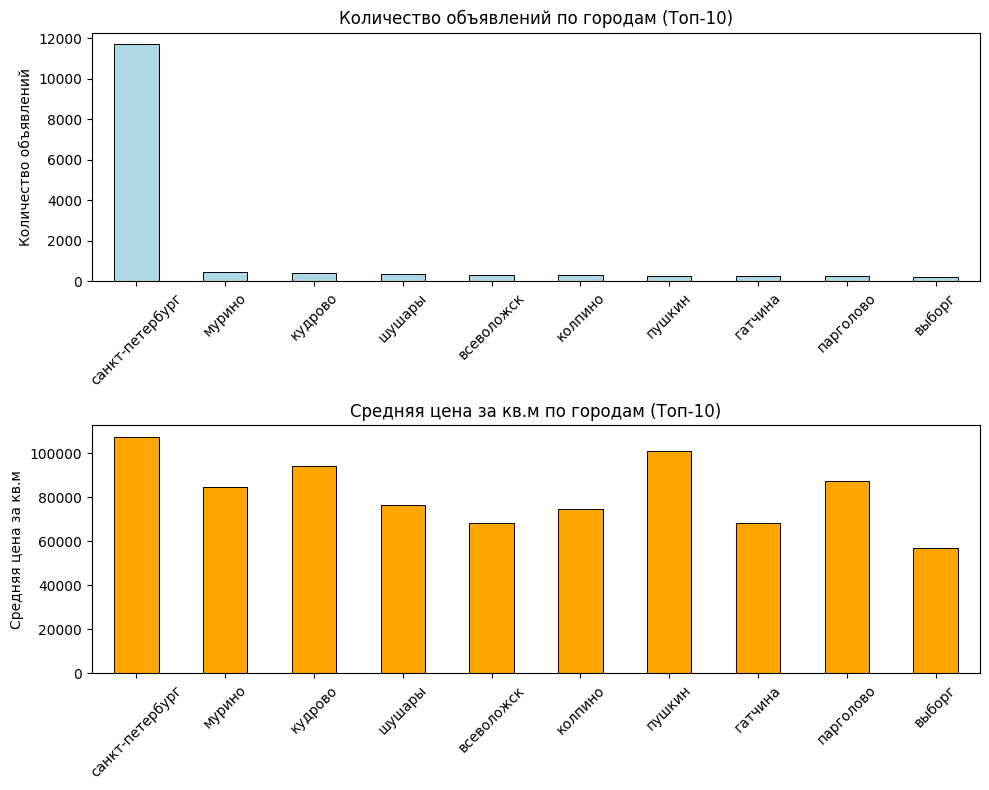

In [108]:
# Совмещенная столбчатая диаграмма
# data_city_grouped.plot(kind='bar', figsize=(12, 6))
# plt.title('Количество объявлений и средняя цена за кв.м по городам (Топ-10)')
# plt.xlabel('Город')
# plt.ylabel('Значение')
# plt.xticks(rotation=45)  # Поворот подписей на оси X для удобства
# plt.legend(title='Метрики')  # Добавление легенды
# plt.show()

# создаем фигуры и две оси на которых буду распологаться графики
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# График для 'count'
data_city_grouped['count'].plot(kind='bar', edgecolor='black', linewidth=0.7, color='lightblue', ax=ax1)
ax1.set_title('Количество объявлений по городам (Топ-10)')
ax1.set_ylabel('Количество объявлений')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('')

# График для 'mean'
data_city_grouped['mean'].plot(kind='bar', edgecolor='black', linewidth=0.7, color='orange', ax=ax2)
ax2.set_title('Средняя цена за кв.м по городам (Топ-10)')
ax2.set_ylabel('Средняя цена за кв.м')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('')

# Отображение графиков
plt.tight_layout()
plt.show()

На графике изображено:
* населенные пункты по убыванию количества обьявлений (график сверху)
* средняя цена за квадратный метр по населенным пунктам

из графиков видно, что самый популярный по количеству обьявлений и одновременно самый дорогой населенный пункт - **Санкт-Петербург**, в котором более 10 тысяч обьявлений, а цена за квадратный метр превышает 100 тысяч. В остальных девяти населенных пунктах количество объявлений примерно одинаковое, однако цена может сильно отличаться.

Так например **Пушкин** - второй после **Санкт-Петербурга** по стоимости квадратного метра, хотя и находится на 7 месте по количеству обьявлений.

Самый дешевый и самый немногочисленный по количеству обьявлений - **Выборг**

## 3.6 Как стоимость объектов зависит от расстояния до центра города.

In [109]:
# Отбираем только обьявления из СПБ
data_spb = data[data['locality_name_striped'] == 'санкт-петербург']
data_spb.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_name_striped,price_per_sqrt_m,day_of_exposition,month_of_exposition,year_of_exposition,floor_type,distance_city_center_km
8741,16,4750000.0,63.0,2018-07-02,3,2.550000,9.0,43.0,6,True,...,1,805.0,40.0,санкт-петербург,75396.83,2,7,2018,другой,11.158
11128,20,5750000.0,51.0,2017-08-09,2,2.550000,14.0,30.0,13,True,...,0,503.0,31.0,санкт-петербург,112745.10,9,8,2017,другой,15.067
20689,17,6900000.0,70.0,2017-11-10,2,2.700000,17.0,27.6,7,True,...,0,503.0,60.0,санкт-петербург,98571.43,10,11,2017,другой,17.046
19527,1,6300000.0,66.0,2018-02-02,3,2.600000,9.0,43.9,7,True,...,0,503.0,17.0,санкт-петербург,95454.55,2,2,2018,другой,13.051
413,1,3700000.0,35.6,2016-06-17,1,2.727001,10.0,17.0,9,True,...,0,503.0,77.0,санкт-петербург,103932.58,17,6,2016,другой,11.212


In [110]:
data_spb.shape

(11705, 29)

In [111]:
# приводим расстояние до центра в км к целому числу
data_spb['distance_city_center_km'] = data_spb['distance_city_center_km'].astype(int)

<ipython-input-111-8e818aeb786a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['distance_city_center_km'] = data_spb['distance_city_center_km'].astype(int)


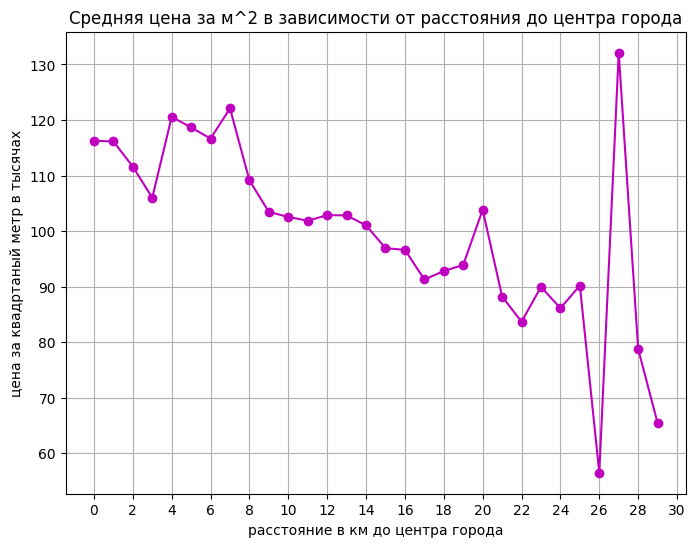

In [129]:
(data_spb
 .assign(price_per_sqrt_m=lambda x: x['price_per_sqrt_m'].apply(lambda y: round(y / 1_000, 2))) # к каждой строчке применяет apply к price_per_sqrt_m
 .pivot_table(index='distance_city_center_km', values='price_per_sqrt_m', aggfunc='median')
 .plot(style='o', linestyle='-', color='m', figsize=(8, 6), grid=True, legend=False)
)

plt.title('Средняя цена за м^2 в зависимости от расстояния до центра города')
plt.xlabel('расстояние в км до центра города')
plt.ylabel('цена за квадртаный метр в тысячах')
plt.locator_params(axis='x', nbins=31) # уменьшает шаг по оси x
plt.show()

Из графика видно, что после 7 км цены на квартиры начинают падать. На определенных расстояних от центра, наблюдается резкий подьем цены с последующим снижением (20й и 27й километры). Возможно это связано с тем, что там расположены элитные жк

# 4. Выводы

В ходе проекта была проведена предобработка данных, с последующим анализом. В изначальных данных было достаточно много пропущенных значений. Природа некоторых была вполне понятна, как например пропущенные значения в столбце с балконом, и эти пропуски можно было легко заменить нулями. Некоторые пропуски, такие как расстояние до центра города и др, были заменены на медианы по районам в котором находится обьявление. Другие же пропуски пришлось удалить из данных либо оставить как есть

В ходе исследования также были получены следующие результаты:

* **Общая площадь напрямую влияет на цену**. Чем выше общая площадь, тем выше цена за квадратный метр. Также с ценой прямо пропорционально связаны жилая площадь, площадь кухни и количество комнат.

* **Получена средняя стоимость обьекта недвижимости по 10 популярным городам**.
Самый популярный и одновременно дорогой для проживания - Санкт-Петрбург. Более 12 тысяч обявлений и со средней ценой более 100 тысяч за квадратный метр. Также стоит отметить, что цена за квдратный метр не всегда зависит от количества обьявлений. На примере Пушкина, который на 7ом месте по количеству обьявлений, было установлено что обьекты оттуда стоят больше, чем в местах более популярных

* **Получен портрет продающейся квартиры**. Веротянее всего квартира из СПБ, находящаяся где-то между первым и последним этажем, в 5ти или 9ти этажном доме. Площадью до 60 м^2 и количеством комнат от 1 до 3. В радиусе километра наверняка находятся парки и водоемы. Средняя стоимость не ниже 60 тыс за метр квадратный.